# Loading and Tidying Data

In this notebook we will focus on some data taken from the [GapMinder](https://www.gapminder.org/data/) project.

***

## Missing data

Let's load some data from a CSV file using `read_csv`:

In [107]:
import pandas as pd

data = pd.read_csv("yearly_co2_emissions_1000_tonnes.csv")
data.head()

,country,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1330.0,1650.0,2270.0,4210.0,6770.0,8460.0,12200.0,10800.0,10000.0,9810.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4250.0,3900.0,3930.0,4370.0,4380.0,4600.0,5240.0,4910.0,5060.0,5720.0
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,107000.0,101000.0,109000.0,110000.0,121000.0,119000.0,121000.0,130000.0,134000.0,145000.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,576.0,546.0,539.0,539.0,517.0,517.0,491.0,488.0,477.0,462.0
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19200.0,22300.0,25200.0,25700.0,27800.0,29100.0,30300.0,33400.0,32600.0,34800.0


This is a straightforward numerical DataFrame which contains a lot of missing values (shown as `NaN`). 
The table shows annual CO<sub>2</sub> emissions from burning fossil fuels for each country.

We can investigate missing data using the [`isnull`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html) method, e.g.:

In [108]:
df=data.isnull()
df.sum().sum()

np.int64(33772)

#### Question
How many values are missing in `data`?

***

## Tidying up!

Data scientists put a lot of emphasis on working with **tidy** data. What do we mean by that?

Tidy data follows the following three rules:

1. Each column is a variable
2. Each row is an observation (also known as a "case")
3. Each cell contains a single value.

When data is tidy, we can visualise and analyse it more easily.

However, most of the data tables that you encounter "in the wild" will not be tidy by this definition, so pandas provides functions to help reshape them into a tidy form.


#### Exercise
Look at the CO<sub>2</sub> data. What are the variables in this dataset?

### [`melt`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html)

We can use the `melt` method to reshape the data:

In [109]:
import pandas as pd

data = pd.read_csv("yearly_co2_emissions_1000_tonnes.csv")
print(f"The 'data' dataframe takes up {data.memory_usage().sum() / 1024:.2f} KB")

df = data.melt(id_vars=['country'], var_name='year', value_name='kt')
print(f"The initial 'df' dataframe takes up {df.memory_usage().sum() / 1024:.2f} KB")
df=df.dropna()
print(f"The cleaned 'df' dataframe takes up {df.memory_usage().sum() / 1024:.2f} KB")

df

The 'data' dataframe takes up 397.63 KB
The initial 'df' dataframe takes up 1188.13 KB
The cleaned 'df' dataframe takes up 528.62 KB


,country,year,kt
182,United Kingdom,1751,9360.0
374,United Kingdom,1752,9360.0
566,United Kingdom,1753,9360.0
758,United Kingdom,1754,9370.0
950,United Kingdom,1755,9370.0
...,...,...,...
50683,Venezuela,2014,185000.0
50684,Vietnam,2014,167000.0
50685,Yemen,2014,22700.0
50686,Zambia,2014,4500.0


`melt` works to *lengthen* the data table by collecting values from multiple columns.

We specify the columns to hold fixed (`country`) and provide the names of two new variables, one to hold the old column labels (`year`) and one to hold
the values collected (`kt`). 

`df` currently has a lot of useless rows.
We can use the [`dropna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) method to remove rows that contain missing data (`NaN`):

In [110]:
df = df.dropna()
df

,country,year,kt
182,United Kingdom,1751,9360.0
374,United Kingdom,1752,9360.0
566,United Kingdom,1753,9360.0
758,United Kingdom,1754,9370.0
950,United Kingdom,1755,9370.0
...,...,...,...
50683,Venezuela,2014,185000.0
50684,Vietnam,2014,167000.0
50685,Yemen,2014,22700.0
50686,Zambia,2014,4500.0


Let's store the tidied data in a new variable, `co2`:

In [111]:
co2 = df

#### Exercise

How much CO<sub>2</sub> was emitted globally  before 1900?

In [112]:
df['year'] = df['year'].astype(int)
df.query('year < 1900')['kt'].sum()


np.float64(42898103.1421)

### Changing data type

There seems to be an issue with the new `year` column. We can check its data type:

In [113]:
co2.dtypes

country     object
year         int64
kt         float64
dtype: object

The `year` column is shown as having an `object` data type, not an `int` as expected. 

This is because the years have been derived from column names (strings) in the previous version of the table. Let's fix this before going any further:

In [114]:
df = co2.copy()
df['year'] = df['year'].astype(int)
df.dtypes

country     object
year         int64
kt         float64
dtype: object

That looks much better!

In [115]:
co2 = df

#### Exercise (again)

How much CO<sub>2</sub> was emitted globally  before 1900?

Plot the annual CO2 emissions of a country of your choice.

The 'data' dataframe takes up 397.63 KB
The initial 'co2' dataframe takes up 528.62 KB
The cleaned 'co2' dataframe takes up 528.62 KB


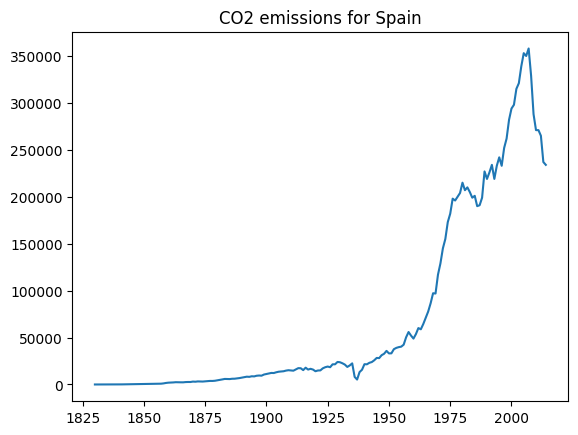

In [116]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("yearly_co2_emissions_1000_tonnes.csv")
print(f"The 'data' dataframe takes up {data.memory_usage().sum() / 1024:.2f} KB")
co2 = data.melt(id_vars=['country'], var_name='year', value_name='kt')
print(f"The initial 'co2' dataframe takes up {df.memory_usage().sum() / 1024:.2f} KB")
co2=co2.dropna()
print(f"The cleaned 'co2' dataframe takes up {df.memory_usage().sum() / 1024:.2f} KB")

country=input('Enter country name: ')

df = co2
df['year'] = df['year'].astype(int)
df=df.query('country == @country')

x = df['year']
y = df['kt']
plt.plot(x,y)
plt.title(f"CO2 emissions for {country}")
plt.show()


<Axes: xlabel='year'>

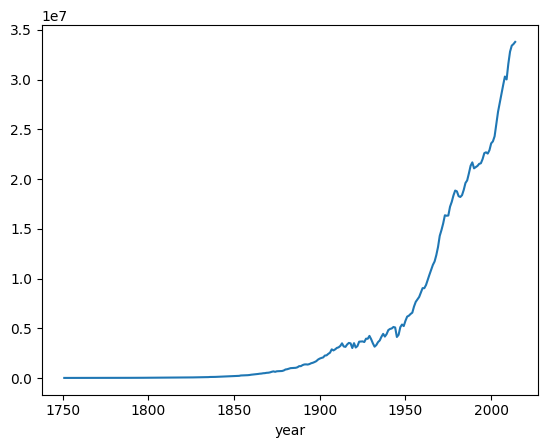

In [129]:
sums = co2.groupby('year')['kt'].sum()
sums.plot()


***

## Missing headers

Now that `co2` is in a tidy form, let's look at another example. `stats_1997.csv` is a CSV file containing GDP and population for various countries for the year 1997.

Actually this file is not in correct CSV format, because it is missing a header row. You can open it in Excel to verify this. However, we can still load it using `read_csv` as follows:

In [117]:
data = pd.read_csv("stats_1997.csv", header=None)
data

,0,1
0,afg-pop,18400000
1,ago-gdp,25700000000
2,ago-pop,15100000
3,alb-gdp,5470000000
4,alb-pop,3090000
...,...,...
370,zaf-pop,43700000
371,zmb-gdp,9120000000
372,zmb-pop,9670000
373,zwe-gdp,15600000000


You can see that the two columns in this file have been given the labels `0` and `1`.

This file looks a bit harder to tidy. 

#### Exercise

What are the variables in this data set and what are the observations?

In [118]:
df = data[0].str.split('-', expand=True)
df.columns = ['geo', 'statistic']
df

,geo,statistic
0,afg,pop
1,ago,gdp
2,ago,pop
3,alb,gdp
4,alb,pop
...,...,...
370,zaf,pop
371,zmb,gdp
372,zmb,pop
373,zwe,gdp


***

## More tidying up!

### [`str.split`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html)

First, we need to split the data from column `0` into two columns: one for the three-letter country code (the variable that was called `geo` in the Excel workbook), and one for the type of measurement (GDP or population).
We can do this with a Series method called `str.split`:

In [119]:
df = data[0].str.split('-', expand=True)
df

,0,1
0,afg,pop
1,ago,gdp
2,ago,pop
3,alb,gdp
4,alb,pop
...,...,...
370,zaf,pop
371,zmb,gdp
372,zmb,pop
373,zwe,gdp


Now let's fix the column names and add on the column with the values:

In [120]:
df.columns = ['geo','statistic']
df['value'] = data[1]
df

,geo,statistic,value
0,afg,pop,18400000
1,ago,gdp,25700000000
2,ago,pop,15100000
3,alb,gdp,5470000000
4,alb,pop,3090000
...,...,...,...
370,zaf,pop,43700000
371,zmb,gdp,9120000000
372,zmb,pop,9670000
373,zwe,gdp,15600000000


### [`pivot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)

Now we need to separate the GDP and population values into two different columns. This is done using the `pivot` method:

In [121]:
df2 = df.pivot(index='geo', columns='statistic', values='value')
df2

statistic,gdp,pop
geo,,
afg,NaN,18400000.0
ago,2.570000e+10,15100000.0
alb,5.470000e+09,3090000.0
and,2.400000e+09,64300.0
are,1.730000e+11,2700000.0
...,...,...
wsm,4.330000e+08,172000.0
yem,1.740000e+10,16400000.0
zaf,2.490000e+11,43700000.0


Now each column is a variable, each row is an observation, and each cell is a single value, so we have successfully tidied the data.

Notice that there are fewer rows than before; The `pivot` action is to *shorten* the length of the table

Notice also that the resulting DataFrame uses the data from the **geo** column as *row labels*. 

Pandas calls this set of labels an [`index`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.index.html). 

In [122]:
df2.index

Index(['afg', 'ago', 'alb', 'and', 'are', 'arg', 'arm', 'atg', 'aus', 'aut',
       ...
       'uzb', 'vct', 'ven', 'vnm', 'vut', 'wsm', 'yem', 'zaf', 'zmb', 'zwe'],
      dtype='object', name='geo', length=195)

Let's store the tidied DataFrame in a new variable:

In [123]:
stats97 = df2

#### Exercise

Visualise the distribution of **pop**.

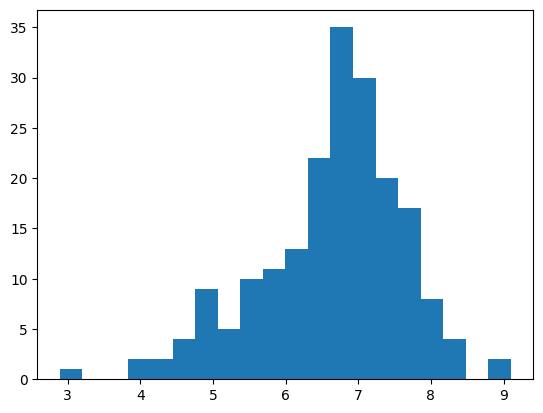

In [124]:
import matplotlib.pyplot as plt
import numpy as np

stats97.describe()
plt.hist(np.log10(stats97['pop']), bins=20)
plt.show()

In 1997, how many countries had a population less than 100,000?

In [125]:
print(stats97.query('pop < 100000')['pop'].count())
print(len(stats97.query('pop < 100000')))

15
15


Make a scatter plot showing GDP vs population.

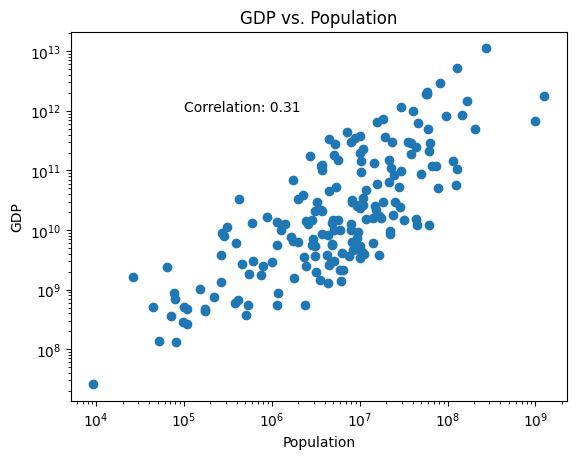

In [126]:
plt.scatter(stats97['pop'], stats97['gdp'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Population')
plt.ylabel('GDP')
plt.title('GDP vs. Population')
corr = stats97['gdp'].corr(stats97['pop'])
plt.text(1e5, 1e12, f'Correlation: {corr:.2f}')

plt.show()

It is often more relevant to compare countries' GDP on a per-capita basis. 
Add GDP per person (**gdp_pp**) as a new column of `stats97`.

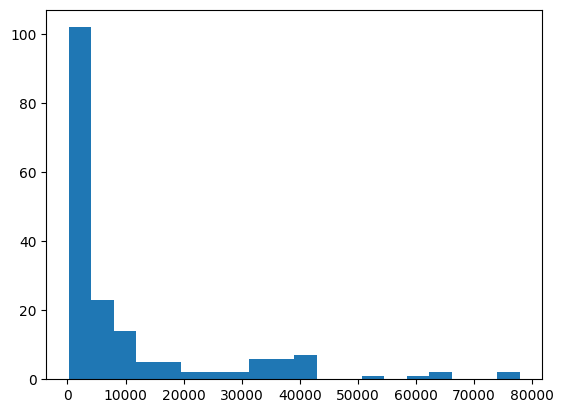

In [127]:
# add a column with gdp_per_capita
stats97['gdp_per_capita'] = stats97['gdp'] / stats97['pop']
plt.hist(stats97['gdp_per_capita'], bins=20)
plt.show()

Visualise the distribution of **gdp_pp**.

***